<a href="https://colab.research.google.com/github/mthSolon/Data_Science/blob/main/bike_rental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('day.csv')
df.head()
df.drop(labels='instant', axis=1, inplace=True)

In [3]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [90]:
df.tail()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [89]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [28]:
df.shape

(731, 15)

In [4]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df['dteday'] = df['dteday'].astype('datetime64')

In [6]:
corrM = df.corr()
corrM['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64

In [7]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

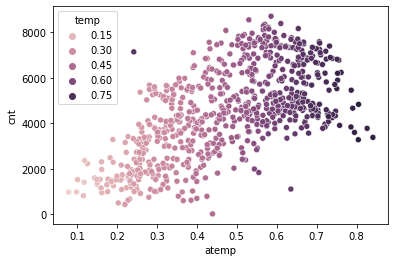

In [8]:
sns.scatterplot(x=df['atemp'], y=df['cnt'], hue=df['temp']);

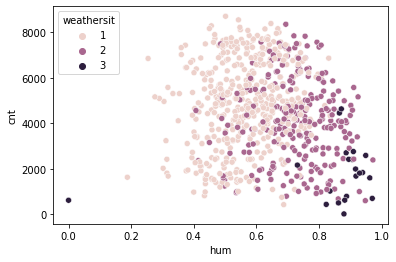

In [9]:
sns.scatterplot(x=df['hum'], y=df['cnt'], hue=df['weathersit']);

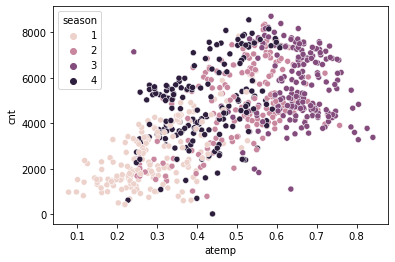

In [10]:
sns.scatterplot(x=df['atemp'], y=df['cnt'], hue=df['season']); #1: primavera, 2: verão, 3: outono, 4: inverno

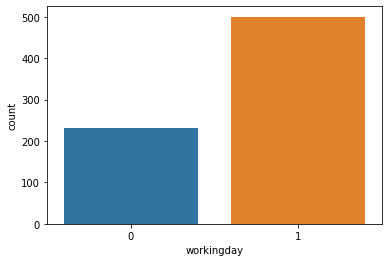

In [11]:
sns.countplot(x=df['workingday']); #1: dia de trabalho, 0: feriado ou fim de semana

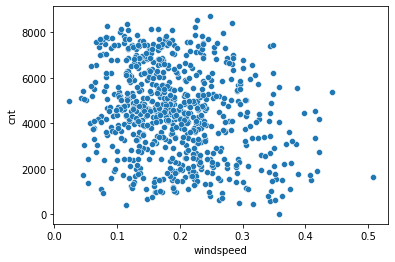

In [12]:
sns.scatterplot(x=df['windspeed'], y=df['cnt']);

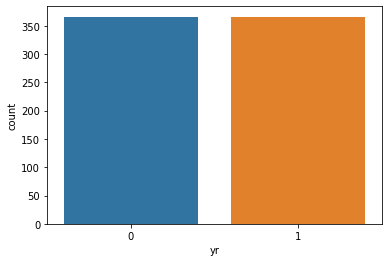

In [14]:
sns.countplot(x=df['yr']);

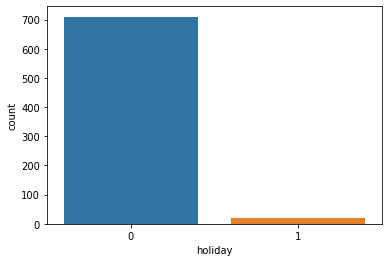

In [22]:
sns.countplot(x=df['holiday']);

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin

class RemoveAtrr(BaseEstimator, TransformerMixin):
  def __init__(self, remove_workingday=True):
    self.remove_workingday = remove_workingday
    print("RemoveAtrr initialized.")
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    if self.remove_workingday:
      return X.drop(columns=['dteday', 'yr', 'holiday', 'weekday', 'workingday', 'casual', 'registered'])
    else:
      return X.drop(columns=['dteday', 'yr', 'holiday', 'weekday', 'casual', 'registered'])

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline_wd = Pipeline([
                     ('atrr_remover', RemoveAtrr()),
                     ('std_scaler', StandardScaler())
])

pipeline = Pipeline([
                     ('atrr_remover', RemoveAtrr(remove_workingday=False)),
                     ('std_scaler', StandardScaler())
])

RemoveAtrr initialized.
RemoveAtrr initialized.


In [48]:
X, y = df.drop('cnt', axis=1), df['cnt'].copy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
X_train_wd

array([[ 0.43287811,  0.40304576,  1.11746531, ...,  0.76053934,
         1.50739036,  0.52060661],
       [ 1.3261672 ,  0.97784119, -0.71054517, ...,  0.21492407,
         0.05827635,  1.16209384],
       [ 0.43287811,  0.40304576, -0.71054517, ...,  1.55681869,
        -0.43554098, -0.48167046],
       ...,
       [ 1.3261672 ,  0.97784119,  1.11746531, ...,  0.78003537,
         1.1399691 , -1.57211366],
       [ 0.43287811,  0.40304576,  1.11746531, ...,  0.90161674,
         0.56973001,  0.72109554],
       [ 0.43287811,  0.11564805, -0.71054517, ...,  1.94118312,
        -0.63248238, -0.18490815]])

In [53]:
X_train_wd = pipeline_wd.fit_transform(X_train)
X_train = pipeline.fit_transform(X_train)

In [79]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [84]:
def rmse(model, y_pred):
  print(f'{model}: {np.sqrt(mean_squared_error(y_test, y_pred))}')

In [62]:
lin_reg = LinearRegression()
sgd = SGDRegressor()
tree = DecisionTreeRegressor()
random = RandomForestRegressor()

In [65]:
lin_reg.fit(X_train_wd, y_train)
sgd.fit(X_train_wd, y_train)
tree.fit(X_train_wd, y_train)
random.fit(X_train_wd, y_train)

RandomForestRegressor()

In [66]:
predict_wd_lin = lin_reg.predict(pipeline_wd.transform(X_test))
predict_wd_sgd = sgd.predict(pipeline_wd.transform(X_test))
predict_wd_tree = tree.predict(pipeline_wd.transform(X_test))
predict_wd_random = random.predict(pipeline_wd.transform(X_test))

In [85]:
rmse('lin', predict_wd_lin)
rmse('sgd', predict_wd_sgd)
rmse('tree', predict_wd_tree)
rmse('random', predict_wd_random)

lin: 1394.7633377561888
sgd: 1393.1196375743684
tree: 1615.4064103959408
random: 1249.787846978207


In [86]:
lin_reg.fit(X_train, y_train)
sgd.fit(X_train, y_train)
tree.fit(X_train, y_train)
random.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
predict_lin = lin_reg.predict(pipeline.transform(X_test))
predict_sgd = sgd.predict(pipeline.transform(X_test))
predict_tree = tree.predict(pipeline.transform(X_test))
predict_random = random.predict(pipeline.transform(X_test))

In [88]:
rmse('lin', predict_lin)
rmse('sgd', predict_sgd)
rmse('tree', predict_tree)
rmse('random', predict_random)

lin: 1390.7436390754178
sgd: 1389.0924857474288
tree: 1667.3223900556702
random: 1253.5555205795674


In [93]:
random.fit(X_train_wd, y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random, pipeline_wd.transform(X_test), y_test, scoring='neg_mean_squared_error', cv=30)
random_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
  print(f'Scores: {scores}')
  print(f'Mean: {scores.mean()}')
  print(f'Standard deviation: {scores.std()}')

display_scores(random_rmse_scores)

Scores: [1181.34661843 1021.88479009 1131.86444877 1021.69351116  753.81147554
  962.75999322  923.25346918 1354.65975529 2078.07940171 1115.04415183
 1461.66159773 1196.05618    1026.78293465 1249.43503877  972.23043571
 1712.90320592 1188.64279083 1585.48890859 1415.92025374 1652.17518175
 1429.21565098  670.35342456 2290.49854106 1308.032954   1549.00917706
  547.58240025 1797.00412548 1134.06587691  888.71460741 1088.6342814 ]
Mean: 1256.9601727342604
Standard deviation: 386.1099342236516


In [98]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [3, 10, 30],'max_features': ['auto', 2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': ['auto', 2, 3, 4]}]

random = RandomForestRegressor()

grid_search = GridSearchCV(random, param_grid, cv=15, scoring='neg_mean_squared_error')
grid_search.fit(pipeline_wd.transform(X_test), y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 345.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=15, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': ['auto', 2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': ['auto', 2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [99]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}